In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('online_gaming_behavior_dataset.csv')

In [3]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [4]:
df.drop(['PlayerID'], axis=1, inplace=True)

In [5]:
df.isna().sum()

Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [6]:
X= df.drop(['EngagementLevel'], axis=1)
y = df['EngagementLevel'].map({'High': 0, 'Low': 1, 'Medium': 2})

In [7]:
X.columns

Index(['Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked'],
      dtype='object')

In [8]:
y[0:5]

0    2
1    2
2    0
3    2
4    2
Name: EngagementLevel, dtype: int64

In [9]:
cat_columns = ['Gender', 'Location', 'GameGenre', 'InGamePurchases', 'GameDifficulty']

In [10]:
X.head()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
0,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25
1,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10
2,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41
3,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47
4,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        40034 non-null  int64  
 1   Gender                     40034 non-null  object 
 2   Location                   40034 non-null  object 
 3   GameGenre                  40034 non-null  object 
 4   PlayTimeHours              40034 non-null  float64
 5   InGamePurchases            40034 non-null  int64  
 6   GameDifficulty             40034 non-null  object 
 7   SessionsPerWeek            40034 non-null  int64  
 8   AvgSessionDurationMinutes  40034 non-null  int64  
 9   PlayerLevel                40034 non-null  int64  
 10  AchievementsUnlocked       40034 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 3.4+ MB


In [12]:
X = pd.get_dummies(X, drop_first=True)

In [13]:
X.head()

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,Gender_Male,Location_Europe,Location_Other,Location_USA,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy,GameDifficulty_Hard,GameDifficulty_Medium
0,43,16.271119,0,6,108,79,25,1,0,1,0,0,0,0,1,0,1
1,29,5.525961,0,5,144,11,10,0,0,0,1,0,0,0,1,0,1
2,22,8.223755,0,16,142,35,41,0,0,0,1,0,0,1,0,0,0
3,35,5.265351,1,9,85,57,47,1,0,0,1,0,0,0,0,0,0
4,33,15.531945,0,2,131,95,37,1,1,0,0,0,0,0,0,0,1


In [14]:
X.shape, y.shape

((40034, 17), (40034,))

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    random_state= 12345,
                                                    train_size = 0.8)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.preprocessing import label_binarize

def get_metrics(model, y_true, y_pred, y_prob, train=True):
    print(f"Accuracy Score {np.round(accuracy_score(y_pred = y_pred, y_true = y_true)*100,2)} %")
    print(f"Precision Score {np.round(precision_score(y_pred = y_pred, y_true = y_true, average='weighted')*100,2)} %")
    print(f"Recall Score {np.round(recall_score(y_pred = y_pred, y_true = y_true, average='weighted')*100,2)} %")
    conf_mat = confusion_matrix(y_pred = y_pred, y_true = y_true)
    cm = ConfusionMatrixDisplay(conf_mat, display_labels=['High','Low', 'Medium'])
    cm.plot()

    if train:
        y_bin = label_binarize(y_true, classes=model.classes_)
        n_classes = y_bin.shape[1]

        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob[:, i])
            roc_auc[i] = roc_auc_score(y_bin[:, i], y_prob[:, i])

        plt.figure()
        colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()

# **Naive Bayes**

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
nb_mc_model = GaussianNB()

In [20]:
nb_mc_model.fit(X_train_sc, y_train)

GaussianNB()

In [21]:
y_tr_pred = nb_mc_model.predict(X_train_sc)
y_tr_prob = nb_mc_model.predict_proba(X_train_sc)

y_ts_pred = nb_mc_model.predict(X_test_sc)
y_ts_prob = nb_mc_model.predict_proba(X_test_sc)

Accuracy Score 83.95 %
Precision Score 85.23 %
Recall Score 83.95 %


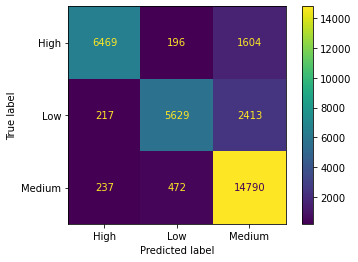

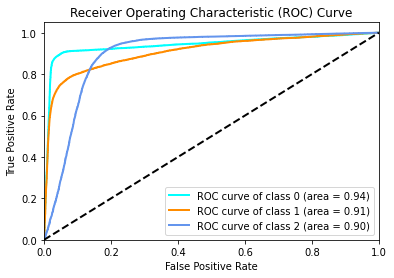

In [22]:
#get_metrics(nb_mc_model, y_pred = y_ts_pred, y_true = y_test, y_prob = y_ts_prob, train=False)
get_metrics(model=nb_mc_model, y_pred = y_tr_pred, y_true = y_train, y_prob = y_tr_prob)

Accuracy Score 84.29 %
Precision Score 85.52 %
Recall Score 84.29 %


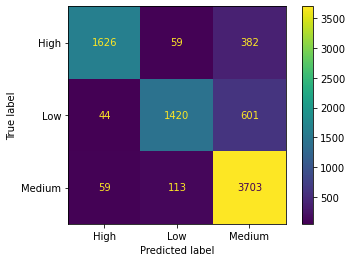

In [23]:
get_metrics(nb_mc_model, y_pred = y_ts_pred, y_true = y_test, y_prob = y_ts_prob, train=False)

# **K Nearest Neighbor**

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn_mc_model = KNeighborsClassifier(n_neighbors = 5)

In [26]:
knn_mc_model.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [27]:
y_tr_pred = knn_mc_model.predict(X_train_sc)
y_tr_prob = knn_mc_model.predict_proba(X_train_sc)
y_ts_pred = knn_mc_model.predict(X_test_sc)
y_ts_prob = knn_mc_model.predict_proba(X_test_sc)

Accuracy Score 80.45 %
Precision Score 80.53 %
Recall Score 80.45 %


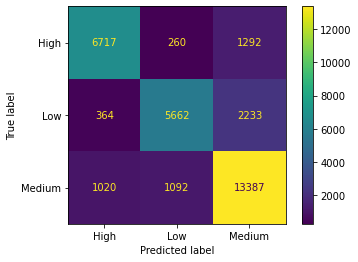

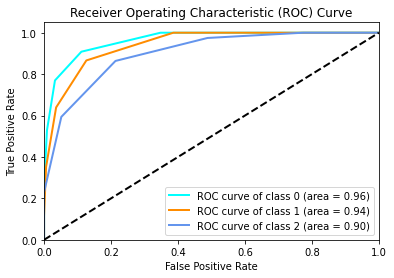

In [28]:
get_metrics(knn_mc_model, y_train, y_tr_pred, y_tr_prob)

# **Decision Tree**

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dt_mc_model = DecisionTreeClassifier(max_depth=10)

In [46]:
dt_mc_model.fit(X_train_sc, y_train)

DecisionTreeClassifier(max_depth=10)

In [47]:
y_tr_pred = dt_mc_model.predict(X_train_sc)
y_tr_prob = dt_mc_model.predict_proba(X_train_sc)

y_ts_pred = dt_mc_model.predict(X_test_sc)
y_ts_prob = dt_mc_model.predict_proba(X_test_sc)

Accuracy Score 90.42 %
Precision Score 90.43 %
Recall Score 90.42 %


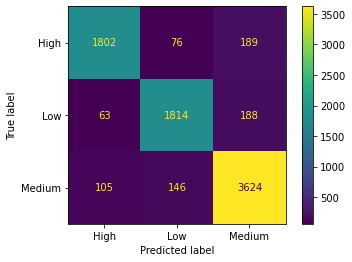

In [48]:
get_metrics(dt_mc_model, y_pred = y_ts_pred, y_true = y_test, y_prob = y_ts_prob, train=False)

Accuracy Score 92.62 %
Precision Score 92.62 %
Recall Score 92.62 %


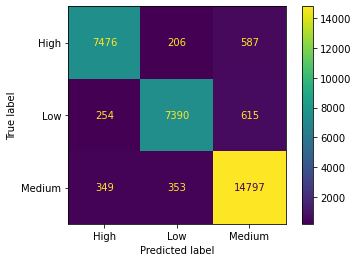

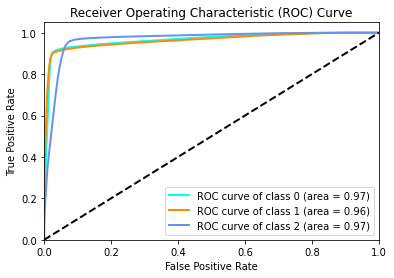

In [49]:
get_metrics(model=dt_mc_model, y_pred = y_tr_pred, y_true = y_train, y_prob = y_tr_prob)

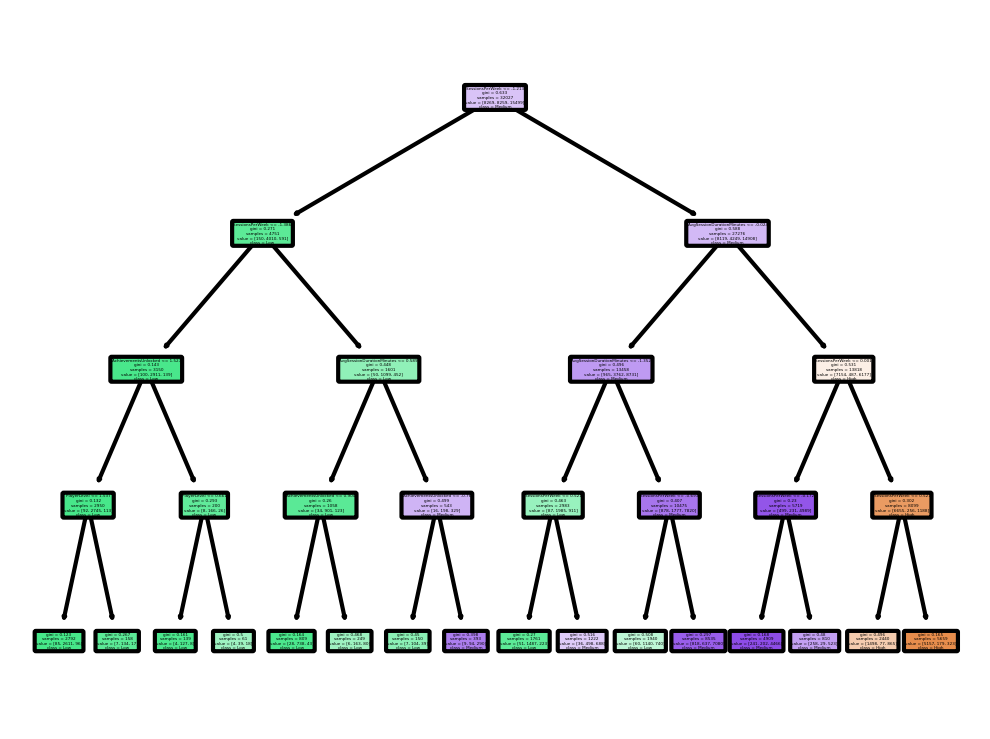

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
features = X.columns

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,3), dpi=300)
plot_tree(dt_mc_model,filled=True,rounded=True, ax=axes, feature_names=features, class_names=['High','Low','Medium'])
#plt.show()
plt.savefig('treeonlinegames.png', format='png')
plt.show()

# **Random Forest**

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf_mc_model = RandomForestClassifier(max_depth=15, n_estimators=101, random_state = 12345)

In [55]:
rf_mc_model.fit(X_train_sc, y_train)

RandomForestClassifier(max_depth=15, n_estimators=101, random_state=12345)

In [56]:
y_tr_pred = rf_mc_model.predict(X_train_sc)
y_tr_prob = rf_mc_model.predict_proba(X_train_sc)

y_ts_pred = rf_mc_model.predict(X_test_sc)
y_ts_prob = rf_mc_model.predict_proba(X_test_sc)

Accuracy Score 90.75 %
Precision Score 90.86 %
Recall Score 90.75 %


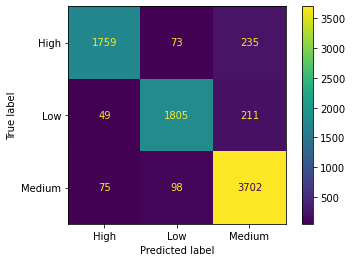

In [59]:
get_metrics(rf_mc_model, y_pred = y_ts_pred, y_true = y_test, y_prob = y_ts_prob, train=False)

Accuracy Score 95.29 %
Precision Score 95.35 %
Recall Score 95.29 %


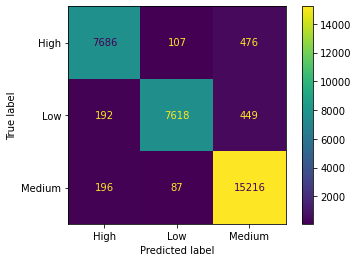

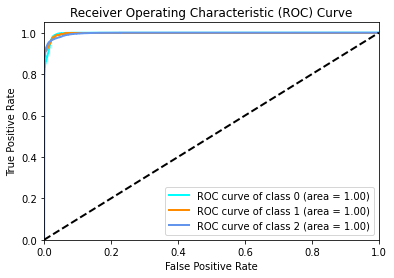

In [60]:
get_metrics(model=dt_mc_model, y_pred = y_tr_pred, y_true = y_train, y_prob = y_tr_prob)